In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
# load data from csv

data_directory = 'data/'

q5_transaction_csv = data_directory + 'q5_transactions.csv'
transaction_csv = data_directory + 'q6_transactions.csv'

transactions = pd.read_csv(q5_transaction_csv, na_values=['None'], index_col=0)


In [3]:
# All categorial features are ignored
transaction_features = transactions[['area_sqft', 'bedrooms', 'median_psf', 'median_price', 'nearby_poi_education', 'nearby_poi_transportation', 'nearby_poi_healthcare']]
transaction_target = transactions[['price']]


In [4]:
transaction_features

,area_sqft,bedrooms,median_psf,median_price,nearby_poi_education,nearby_poi_transportation,nearby_poi_healthcare
0,0.203388,0.428571,0.213852,0.101399,0.343137,0.238095,0.200000
1,0.147231,0.428571,0.213852,0.101399,0.343137,0.238095,0.200000
2,0.147231,0.428571,0.213852,0.101399,0.343137,0.238095,0.200000
3,0.373029,0.428571,0.213852,0.101399,0.343137,0.238095,0.200000
4,0.075700,0.285714,0.156744,0.048485,0.392157,0.261905,0.333333
...,...,...,...,...,...,...,...
144,0.381498,0.428571,0.178615,0.146853,0.323529,0.190476,0.066667
145,0.150098,0.428571,0.240583,0.087413,0.392157,0.285714,0.200000
146,0.269316,0.428571,0.186513,0.111888,0.235294,0.119048,0.133333
147,0.102410,0.428571,0.354192,0.096503,0.303922,0.166667,0.066667


In [5]:
# Dimensional Reduction

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(transaction_features)
principal_df = pd.DataFrame(
    data = principal_components,
    columns = {'principle_component_1', 'principle_component_2'}
)

In [6]:
principal_df

,principle_component_2,principle_component_1
0,0.050087,-0.004636
1,0.061464,-0.036107
2,0.061464,-0.036107
3,0.015717,0.090432
4,0.220937,-0.164422
...,...,...
144,-0.097353,0.077753
145,0.117273,-0.015238
146,-0.126650,-0.018854
147,-0.055411,-0.047729


In [7]:
transactions_pca = pd.concat(
    [principal_df, transaction_target], axis = 1
)

In [8]:
transactions_pca

,principle_component_2,principle_component_1,price
0,0.050087,-0.004636,610000
1,0.061464,-0.036107,720000
2,0.061464,-0.036107,670000
3,0.015717,0.090432,1100000
4,0.220937,-0.164422,280000
...,...,...,...
144,-0.097353,0.077753,1100000
145,0.117273,-0.015238,675000
146,-0.126650,-0.018854,850000
147,-0.055411,-0.047729,740000


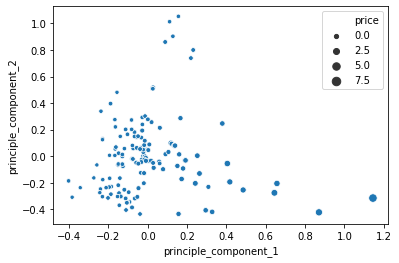

In [9]:
sns.scatterplot(
    x = transactions_pca['principle_component_1'],
    y = transactions_pca['principle_component_2'],
    size = transactions_pca['price']
)

In [10]:
transactions_pca.to_csv(transaction_csv)